<a href="https://colab.research.google.com/github/rkat7/torch-notes/blob/main/pytorch_running_notes_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn



#Generic torch workflow

. Prep the data -> Convert to Tensors
* Build model:
  . Pick a model
  . Pick loss function and optimize
  . Build training loop
* Training:
  . Fit the model to the data that you have - to find patterns
* Inference:
  . Making predictions and evaluating the model on test data
* Saving and loading a model
  . May want to use model elsewhere or come back later



  



In [2]:
#pytorch has 4-5 important modules
# torch.nn
# torch.optim
# torch.utils.data.dataset
# torch,utils.data.dataloader



* torch.nn contains building blocks for all computational graphs

* torch.nn.Parameter stores the tensors being used by nn.Module (if requires_grad=True, gradients are automatically calculatedvia gradientDescent -> called "autograd")

* torch.nn.Module is the base of all neural network classes and your model class HAS to inherit it and implement "forward()" method

* torch.optim has optimization algorithms to tweak the parameters such that gradientdescent is improved and loss is reduced.

* forward() method defines how the data passed to the class is dealt with/ defines the computation







In [8]:
#example torch model

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return x * self.weight + self.bias



In [18]:
#set manual seed as nn parameters are randomly initialized
torch.manual_seed(42)

model_0 = LinearRegressionModel()

#get the model's params
print(list(model_0.parameters()))

# can also get the state of the model - (what the model contains)
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [ ]:
# make predictions using torch.inference_mode()

# its a context manager that speeds up inference by making switching off things like gradient tracking that are only required for traning but not inference
 # and makes faster forwardpasses (forward() method runs)

#note: it used to be torch.no_grad() in previous pytorch versions

In [ ]:
with torch.inference_mode():
  model_0(torch.tensor([1,2,3])) #--> some test data

# this would give very wrong results as we used randn params

#the trick is to make the model predict these values (the params) -> and the recipe is to use a loss function and an optimizer
# a loss function would calculate how wrong or by how far off the model's predictions are wrong compared to the truth labels (lower the better)
# eg: MAE for regression (torch.nn.L1loss()), binary cross entropy for binary classification (torch.nn.BCELoss())

#optimize tells the model how to update its internal params to lower the loss
# eg: stochastic gradient descent (torch.optim.SGD()) ; Adam optimizer (torch.optim.Adam())




In [ ]:
loss_fn = nn.L1loss()
optimizer = nn.optim.SGD(model_0.parameters(), lr=0.01) #lr is learning rate - a hyperparameter that determines the rate at which parameters are adjusted
                                                        # too high means its unstable and optimizer might fail and if its too low optimizer might take a long time to find ideal params


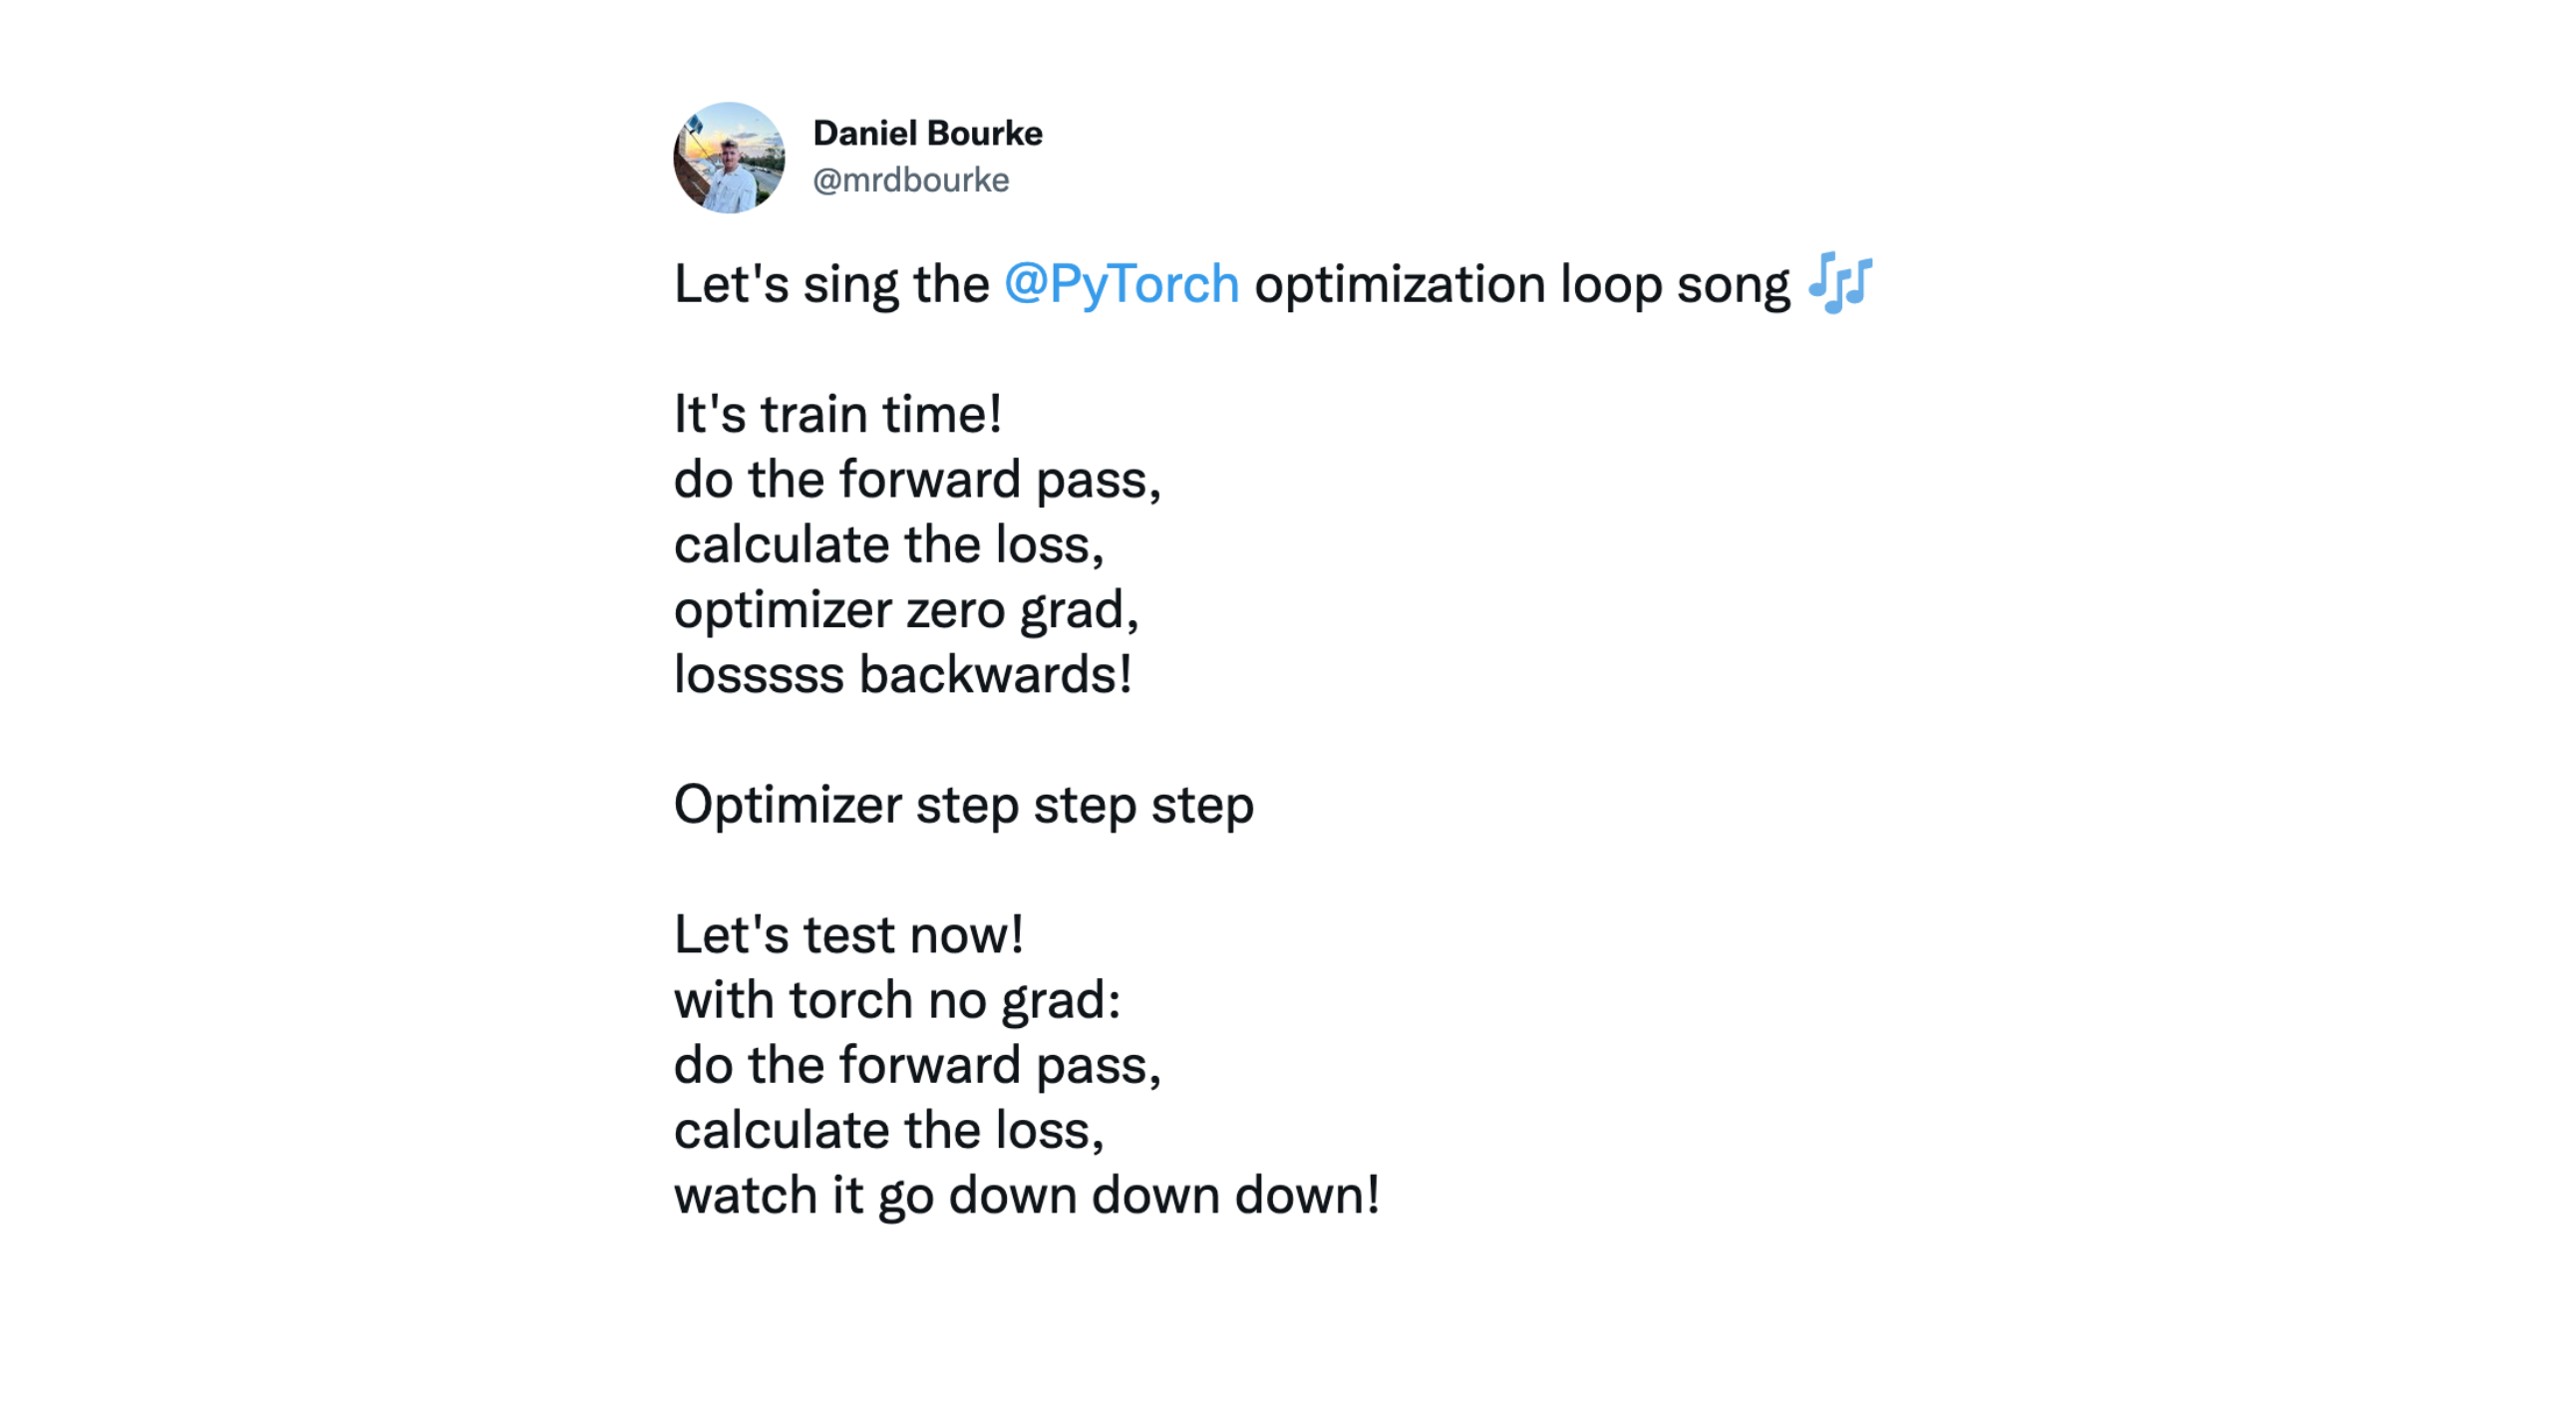

In [ ]:
#pytorch training loops can be quite flexible
# a generic one may look like:

for epoch in range(epochs):
  model.train()     # put model in training mode (this is default state of a model)

  y_pred = model(X_train)   # 1. Forward pass on train data using the forward() method inside

  loss = loss_fn(y_pred, y_true)  # 2. Calc loss

  optimizer.zero_grad()   # 3. zero the gradients as they accumulate by default

  loss.backward()   # 4. perform backpropogation on the loss

  optimizer.step()  # 5. progress/step the optimizer (gradient descent)

In [ ]:
#pytorch testing loop

epoch_count = []
train_loss_values = []
test_loss_values = []

# ^^ setup empty lists to keep track of model progress


for epoch in epochs:
  ### training loop code here###

  ### testing starts here ###

  model.eval() # put the model on evaluation mode (this turns off functionality needed for training but not evaluation)

  with torch.inference_mode(): #turn on inference mode context manager

    test_pred = model(X_test) # forward pass on test data

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch {epoch} | MAE train loss: {loss} | MAE test loss: {test_loss}")



